In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

import torchvision
from torchvision import transforms, utils, models

import matplotlib.pyplot as plt
import numpy as np

from functools import partial, reduce
from typing import List
from pytorch_i3d.pytorch_i3d import InceptionI3d
from datasetMVAD import MVADDataset
import os
from transforms import mvad_basic_transform, mvad_augment_transform
import time
from extract_feature import Extractor

In [2]:
if torch.cuda.is_available():
    device = torch.device('cuda:1')

In [3]:
#i3d = InceptionI3d(157, end_module='Mixed_5c')
#i3d.load_state_dict(torch.load('./pytorch_i3d/models/rgb_charades.pt'), strict=False)
i3d = InceptionI3d(400, end_module='Mixed_5c')
i3d.load_state_dict(torch.load('./pytorch_i3d/models/rgb_kinetics.pth'), strict=True)
i3d.to(device)
i3d.eval()

InceptionI3d(
  (avg_pool): AvgPool3d(kernel_size=[2, 7, 7], stride=(1, 1, 1), padding=0)
  (dropout): Dropout(p=0.5)
  (logits): Unit3D(
    (conv3d): Conv3d(1024, 400, kernel_size=[1, 1, 1], stride=(1, 1, 1))
  )
  (Conv3d_1a_7x7): Unit3D(
    (conv3d): Conv3d(3, 64, kernel_size=[7, 7, 7], stride=(2, 2, 2), bias=False)
    (bn): BatchNorm3d(64, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
  )
  (MaxPool3d_2a_3x3): MaxPool3dSamePadding(kernel_size=[1, 3, 3], stride=(1, 2, 2), padding=0, dilation=1, ceil_mode=False)
  (Conv3d_2b_1x1): Unit3D(
    (conv3d): Conv3d(64, 64, kernel_size=[1, 1, 1], stride=(1, 1, 1), bias=False)
    (bn): BatchNorm3d(64, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
  )
  (Conv3d_2c_3x3): Unit3D(
    (conv3d): Conv3d(64, 192, kernel_size=[3, 3, 3], stride=(1, 1, 1), bias=False)
    (bn): BatchNorm3d(192, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
  )
  (MaxPool3d_3a_3x3): MaxPool3dSamePadding(kerne

In [4]:
MVAD_PATH = '../MVAD'
MVAD_CORPUS_PATH = os.path.join(MVAD_PATH, 'corpus_M-VAD_train.txt')
MVAD_VIDEOS_PATH = os.path.join(MVAD_PATH, 'video')
transform = mvad_augment_transform()
train_dataset = MVADDataset(MVAD_VIDEOS_PATH, MVAD_CORPUS_PATH, train=True, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=1, shuffle=False, num_workers=4)

In [ ]:
MVAD_TRAIN_SAVE_PATH = os.path.join(MVAD_PATH, 'I3D_rgb_kinetics', 'train_fliped')
train_extractor = Extractor(i3d, MVAD_TRAIN_SAVE_PATH, gpu_device=device)
error_files = train_extractor.extract_feature_from_loader(train_loader)

100 have extracted - 84s
200 have extracted - 167s
300 have extracted - 272s
400 have extracted - 364s
500 have extracted - 464s
600 have extracted - 557s
700 have extracted - 637s
800 have extracted - 725s
900 have extracted - 816s
1000 have extracted - 905s
1100 have extracted - 993s
1200 have extracted - 1073s
1300 have extracted - 1148s
1400 have extracted - 1240s
1500 have extracted - 1324s
1600 have extracted - 1411s
1700 have extracted - 1526s
1800 have extracted - 1668s
1900 have extracted - 1783s
2000 have extracted - 1885s
2100 have extracted - 2002s
2200 have extracted - 2189s
2300 have extracted - 2267s
2400 have extracted - 2348s
2500 have extracted - 2426s
2600 have extracted - 2508s
2700 have extracted - 2594s
2800 have extracted - 2682s
2900 have extracted - 2762s
3000 have extracted - 2838s
3100 have extracted - 2919s
3200 have extracted - 3004s
3300 have extracted - 3090s
3400 have extracted - 3169s
3500 have extracted - 3243s
3600 have extracted - 3332s
3700 have ext

In [ ]:
error_files

In [6]:
dataiter = iter(train_loader)
sample = dataiter.next()

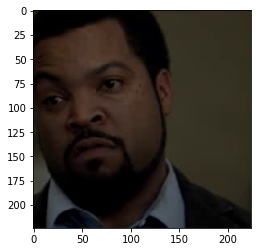

In [7]:
import matplotlib.pyplot as plt
image = sample['video'][0, :, 0] * 0.5 + 0.5
plt.imshow(np.transpose(image, (1, 2, 0)))

In [24]:
plt.imshow(np.transpose(sample['video'][0, :, 0] * 0.5 + 0.5, (1, 2, 0)))

ValueError: negative step not yet supported

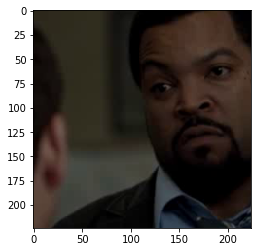

In [46]:
plt.imshow(image.permute(1, 2, 0).flip((1)))

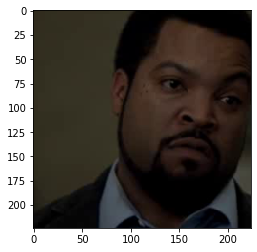

In [11]:
import matplotlib.pyplot as plt
image = sample['video'][0, :, 0] * 0.5 + 0.5
plt.imshow(np.transpose(image, (1, 2, 0)))

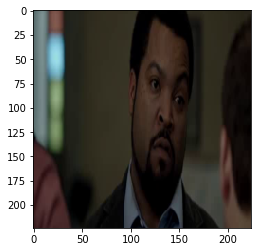

In [5]:
import matplotlib.pyplot as plt
image = sample['video'][0, :, 0] * 0.5 + 0.5
plt.imshow(np.transpose(image, (1, 2, 0)))